<a href="https://colab.research.google.com/github/ohseungtae/Project_SSJG_Gangseo/blob/main/Clustering/%EC%BD%98%ED%85%90%EC%B8%A0%EA%B8%B0%EB%B0%98_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [ ]:
import random
import numpy as np
import os
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots


# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
# settings
import warnings
warnings.filterwarnings("ignore")


### random seed 고정

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/kaggle/animation movie recomentation system/data
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/kaggle/animation movie recomentation system/data')
print(sys.path)
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

/content/drive/MyDrive/Colab Notebooks/kaggle/animation movie recomentation system/data
['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/Colab Notebooks/kaggle/animation movie recomentation system/data']
[]


In [ ]:
import pandas as pd
anim_df = pd.read_csv('./Animation_Movies.csv')

In [ ]:
anim_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [ ]:
anim_df = anim_df.drop_duplicates()

In [ ]:
anim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

In [ ]:
anim_df.drop(columns = ['imdb_id','backdrop_path','homepage','poster_path','tagline','production_companies','production_countries', 'spoken_languages'], inplace = True)

In [ ]:
anim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51945 non-null  int64  
 1   title              51944 non-null  object 
 2   vote_average       51945 non-null  float64
 3   vote_count         51945 non-null  int64  
 4   status             51945 non-null  object 
 5   release_date       49808 non-null  object 
 6   revenue            51945 non-null  int64  
 7   runtime            51945 non-null  int64  
 8   adult              51945 non-null  bool   
 9   budget             51945 non-null  int64  
 10  original_language  51945 non-null  object 
 11  original_title     51944 non-null  object 
 12  overview           45866 non-null  object 
 13  popularity         51945 non-null  float64
 14  genres             51945 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 5.6+ MB


## spotify 코드기반 추천시스템

In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
anim_df = anim_df.dropna(axis=0)
anim_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,overview,popularity,genres
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,"Animation, Family, Adventure, Drama, Comedy"
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,"Animation, Comedy, Family, Adventure"
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,"Animation, Family"
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,en,Coco,Despite his family’s baffling generations-old ...,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,"Animation, Family, Science Fiction"


In [ ]:
genre_data = anim_df.copy()

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
# X = anim_df.select_dtypes(np.number)
# cluster_pipeline.fit(X)
# anim_df['cluster'] = cluster_pipeline.predict(X)

# k-means 클러스터링

In [ ]:
# 수치형 변수만 추출
selected_columns = genre_data.select_dtypes(include=['number']).columns.tolist()

ss = StandardScaler()
genre_data[selected_columns] = ss.fit_transform(genre_data[selected_columns])

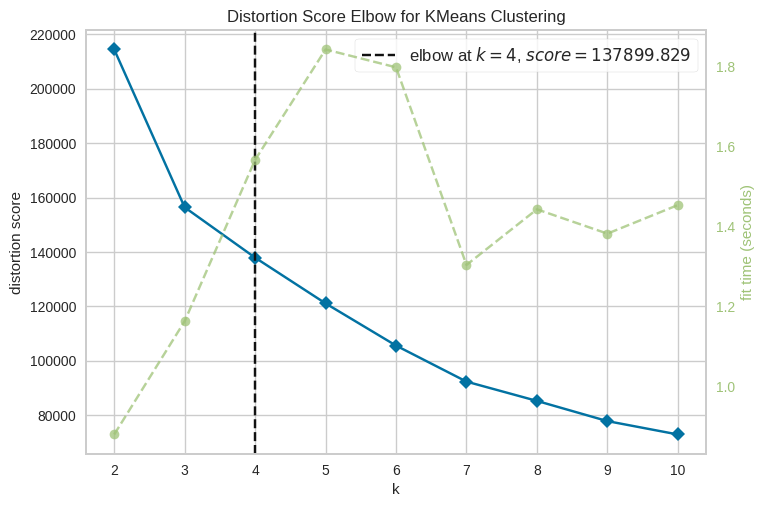

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
X = anim_df.select_dtypes(np.number)
# 선택한 변수들에 대해 스케일링 수행
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(genre_data[selected_columns])
Elbow_M.show()

plt.show()

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10, metric='silhouette')
Elbow_M.fit(genre_data[selected_columns])
Elbow_M.show()

plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import silhouette_score
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.show()
visualize_silhouette_layer(genre_data[selected_columns])

KeyboardInterrupt: 

In [ ]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=10,
                                   verbose=False))
                                 ], verbose=False)

data = anim_df.copy()
X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

In [ ]:
# Visualizing the Clusters with PCA

from sklearn.decomposition import PCA
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['title']
projection['cluster'] = data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

In [ ]:
pip install spotify
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=os.environ["SPOTIFY_CLIENT_ID"],
                                                           client_secret=os.environ["SPOTIFY_CLIENT_SECRET"]))
def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)


from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):

    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data

    except IndexError:
        return find_song(song['name'], song['year'])


def get_mean_vector(song_list, spotify_data):

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

# 영화 추천 관련 코드 참고

### Demographic Filtering

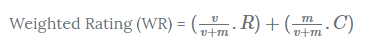

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

In [ ]:
anim_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,overview,popularity,genres
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,175000000,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,"Animation, Family, Adventure, Drama, Comedy"
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,175000000,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,"Animation, Comedy, Family, Adventure"
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,94000000,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,"Animation, Family"
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,175000000,en,Coco,Despite his family’s baffling generations-old ...,166.578,"Family, Animation, Fantasy, Music, Comedy, Adv..."
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,180000000,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,"Animation, Family, Science Fiction"


In [ ]:
 anim_df = anim_df[anim_df['vote_count'] != 0]

In [ ]:
anim_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21166 entries, 0 to 21165
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21166 non-null  int64  
 1   title              21166 non-null  object 
 2   vote_average       21166 non-null  float64
 3   vote_count         21166 non-null  int64  
 4   status             21166 non-null  object 
 5   release_date       21010 non-null  object 
 6   revenue            21166 non-null  int64  
 7   runtime            21166 non-null  int64  
 8   adult              21166 non-null  bool   
 9   budget             21166 non-null  int64  
 10  original_language  21166 non-null  object 
 11  original_title     21166 non-null  object 
 12  overview           19616 non-null  object 
 13  popularity         21166 non-null  float64
 14  genres             21166 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 2.4+ MB


In [ ]:
C= anim_df['vote_average'].mean()
C

6.36754615893414

* 따라서 모든 영화의 평균 평점은 10점 만점에 약 2점입니다.

* 다음 단계는 차트에 이름을 올리는 데 필요한 최소 득표수인 m에 대한 적절한 값을 결정하는 것입니다.
* 우리는 90 백분위수를 컷오프로 사용할 것입니다. 즉, 한
영화가 차트에 등장하려면 목록에 있는 영화의 90% 이상의 득표율을 얻어야 합니다.

In [ ]:
m= anim_df['vote_count'].quantile(0.90)
m

58.0

In [ ]:
q_movies = anim_df.copy().loc[anim_df['vote_count'] >= m]
q_movies.shape

(2124, 15)

이렇게 추려진 444개의 영화로 weighted_rating함수를 통해 좋은 영화만 추리기

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
13,Spirited Away,14913,8.539,8.530587
32,Your Name.,10303,8.514,8.501984
109,Grave of the Fireflies,4861,8.455,8.430387
121,Spider-Man: Across the Spider-Verse,4394,8.442,8.414974
16,Spider-Man: Into the Spider-Verse,14024,8.404,8.395612
43,Howl's Moving Castle,8720,8.402,8.388557
147,A Silent Voice: The Movie,3566,8.402,8.369440
57,Princess Mononoke,7228,8.338,8.322314
283,Neon Genesis Evangelion: The End of Evangelion,1379,8.339,8.259428
361,Hotarubi no Mori e,987,8.363,8.252248


단순 통계학적으로 인기있는 영화 추리기 완료

Text(0.5, 1.0, 'Popular Movies')

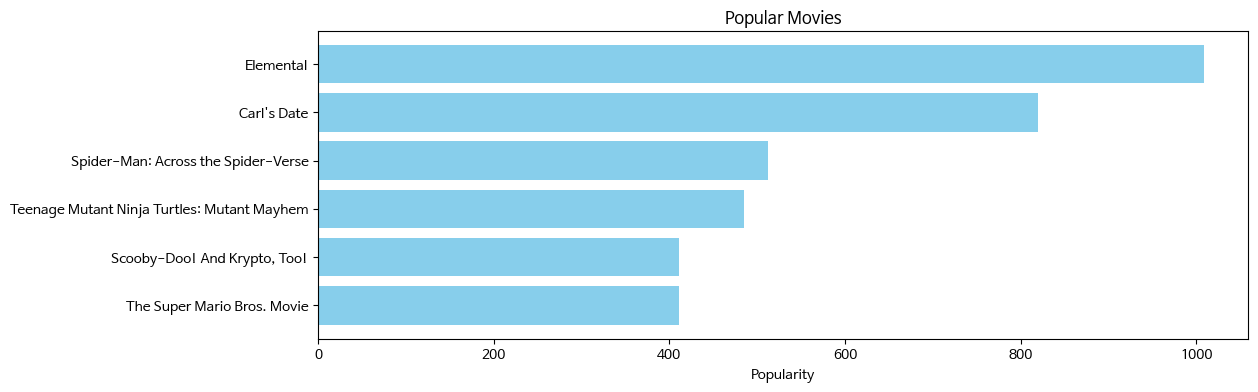

In [ ]:
pop= anim_df.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

## Content Based Filtering


이 추천 시스템에서는 영화의 내용(개요, 출연진, 제작진, 키워드, 태그라인 등)을 사용하여 다른 영화와의 유사성을 찾습니다. 그런 다음 가장 유사할 가능성이 높은 영화를 추천합니다.

데이터가 너무 많아서 세션이 다운됨 vote_count가 0인 행 다 없앰

In [ ]:
df2 = anim_df.copy()

df2['overview'].head(5)

0    Growing up can be a bumpy road, and it's no ex...
1    Carl Fredricksen spent his entire life dreamin...
2    Nemo, an adventurous young clownfish, is unexp...
3    Despite his family’s baffling generations-old ...
4    What if mankind had to leave Earth and somebod...
Name: overview, dtype: object

TF-IDF 매트릭스로 워드 임베딩 해봄

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(21166, 43561)

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [ ]:
get_recommendations("Howl's Moving Castle")

14451                                   Hassle in a Castle
16940                                             I'm Here
3936                          Fritzi: A Revolutionary Tale
12377                                        The Scarecrow
7792                                        A Drop of Gold
15544    Adventures in the Emerald City: The Mystery of...
15769                                             Penelope
19794                                       The Fatal Note
18492                                          Realisation
10219                                  Buddy of the Legion
Name: title, dtype: object

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19524 entries, 0 to 21165
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 19524 non-null  int64  
 1   title              19524 non-null  object 
 2   vote_average       19524 non-null  float64
 3   vote_count         19524 non-null  int64  
 4   status             19524 non-null  object 
 5   release_date       19524 non-null  object 
 6   revenue            19524 non-null  int64  
 7   runtime            19524 non-null  int64  
 8   adult              19524 non-null  bool   
 9   budget             19524 non-null  int64  
 10  original_language  19524 non-null  object 
 11  original_title     19524 non-null  object 
 12  overview           19524 non-null  object 
 13  popularity         19524 non-null  float64
 14  genres             19524 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 2.3+ MB


In [ ]:
df3 = anim_df.copy()

# 'genre'열의 NaN 값을 빈 문자열로 대체
df3['genres'] = df3['genres'].fillna('')

# 각 장르를 개별 열로 분할
df3['genres'] = df3['genres'].str.split(', ')

# 원-핫 인코딩을 위해 각 장르를 개별 행으로 분할
df_genre = df3.explode('genres')

# 원-핫 인코딩 수행
df_genre = pd.get_dummies(df_genre, columns=['genres'], prefix='', prefix_sep='')

# 영화별로 장르별 합계를 계산하여 원래의 형태로 재구성
df_genre = df_genre.groupby('title').sum().reset_index()

# 원래 데이터프레임과 원-핫 인코딩된 장르를 병합
df3 = pd.merge(df3, df_genre, on='title', how='left')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# 장르 데이터만 추출하여 유사도 계산
genre_data = df3.drop(columns=df3.columns[:28])
cosine_sim = cosine_similarity(genre_data, genre_data)

# 영화 제목을 인덱스로 변환하는 시리즈 생성
indices = pd.Series(df3.index, index=df3['title']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations_genres(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df3['title'].iloc[movie_indices]


In [ ]:
get_recommendations_genres('Your Name.')

232               The Garden of Words
294       I Want to Eat Your Pancreas
375                    Only Yesterday
469                Millennium Actress
573                  Flavors of Youth
720     Josee, the Tiger and the Fish
937     Words Bubble Up Like Soda Pop
1342            I've Always Liked You
1799        The Stranger by the Shore
2401                          My Love
Name: title, dtype: object

In [ ]:
get_recommendations_genres('Your Name.')

232               The Garden of Words
294       I Want to Eat Your Pancreas
375                    Only Yesterday
469                Millennium Actress
573                  Flavors of Youth
720     Josee, the Tiger and the Fish
937     Words Bubble Up Like Soda Pop
1342            I've Always Liked You
1799        The Stranger by the Shore
2401                          My Love
Name: title, dtype: object